# Polynomial Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.figsize'] = (8, 5)
%config InlineBackend.figure_format = 'retina'

### Linear models

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon$

$\begin{bmatrix} \vdots \\ y \\ \vdots \end{bmatrix} = \beta_0
+ \beta_1 \begin{bmatrix} \vdots \\ x_1 \\ \vdots \end{bmatrix}
+ \beta_2 \begin{bmatrix} \vdots \\ x_2 \\ \vdots \end{bmatrix}
+ \dots
+ \beta_n \begin{bmatrix} \vdots \\ x_n \\ \vdots \end{bmatrix}
+ \begin{bmatrix} \vdots \\ \epsilon \\ \vdots \end{bmatrix}$

$X = 
\begin{bmatrix} 
\vdots & \vdots & & \vdots \\ 
x_1 & x_2 & \dots & x_n \\ 
\vdots & \vdots & & \vdots 
\end{bmatrix}$

### A simple linear model

$y = \beta_1 x_1 + \beta_2 x_2 + \epsilon$

### Extending this to a $2^{nd}$ degree polynomial model

$y = \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_1 x_2 + \beta_5 x_2^2 + \epsilon$

$x_1 x_2$ is an interaction term between $x_1$ and $x_2$

### Reparameterize the model

$y = \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_1 x_2 + \beta_5 x_2^2 + \epsilon$

$\begin{matrix}
x_3 & \rightarrow & x_1^2 \\
x_4 & \rightarrow & x_1 x_2 \\
x_5 & \rightarrow & x_2^2
\end{matrix}$

$y = \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \epsilon$

### !!! But that's just a linear model

### Given the matrix of measured features $X$:

$X = 
\begin{bmatrix} 
\vdots & \vdots \\ 
x_1 & x_2 \\ 
\vdots & \vdots
\end{bmatrix}$

### All we need to do is fit a linear model using the following feature matrix $X_{poly}$:

$X_{poly} = 
\begin{bmatrix} 
\vdots & \vdots & \vdots & \vdots & \vdots \\ 
x_1 & x_2 & x_1^2 & x_1 x_2 & x_2^2 \\ 
\vdots & \vdots & \vdots & \vdots & \vdots 
\end{bmatrix}$

## Some experimental data: Temperature vs. Yield

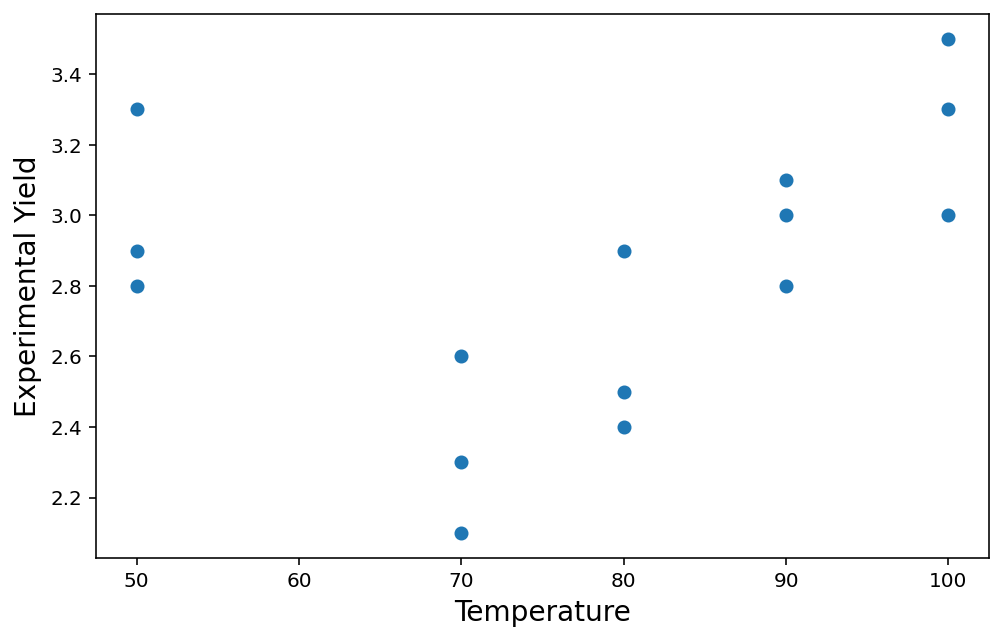

In [52]:
temperature = np.array([50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100])
experimental_yield = np.array([3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3, 3.1, 2.8, 3.3, 3.5, 3])

plt.plot(temperature, experimental_yield, 'o')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield');

### Rearranging the data for use with sklearn

In [53]:
X = temperature.reshape([-1,1])
y = experimental_yield
X

array([[ 50],
       [ 50],
       [ 50],
       [ 70],
       [ 70],
       [ 70],
       [ 80],
       [ 80],
       [ 80],
       [ 90],
       [ 90],
       [ 90],
       [100],
       [100],
       [100]])

# Fit yield vs. temperature data with a linear model

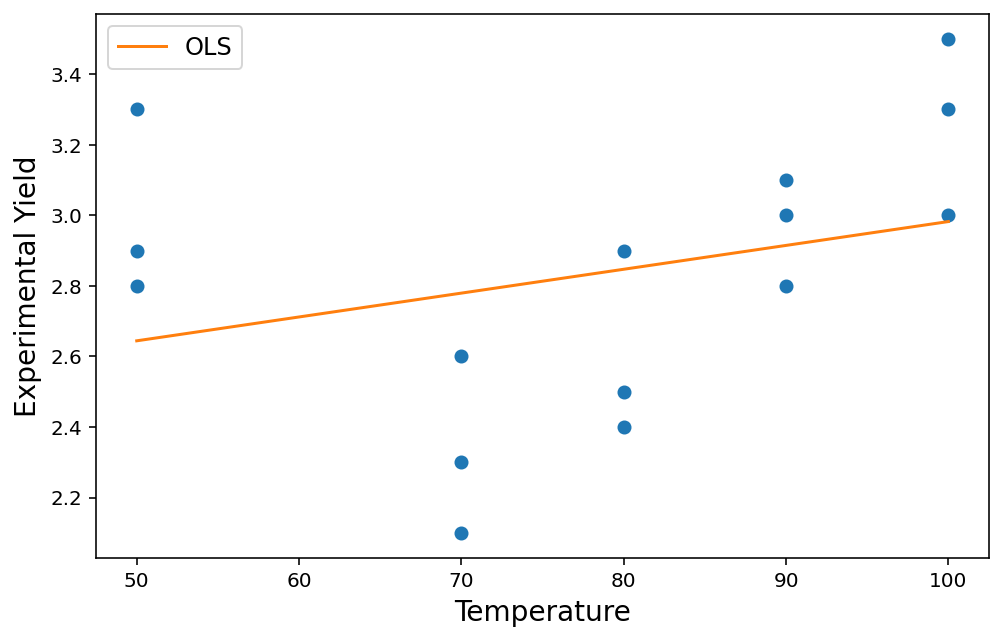

In [54]:
from sklearn.linear_model import LinearRegression

ols_model = LinearRegression()
ols_model.fit(X, y)

plt.plot(temperature, experimental_yield, 'o')
plt.plot(temperature, ols_model.predict(X), '-', label='OLS')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield')
plt.legend();

# Fit yield vs. temperature data with a $2^{nd}$ degree polynomial model

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)

X.shape, X_poly2.shape

((15, 1), (15, 3))

In [ ]:
poly2_model = LinearRegression()
poly2_model.fit(X_poly2, y)

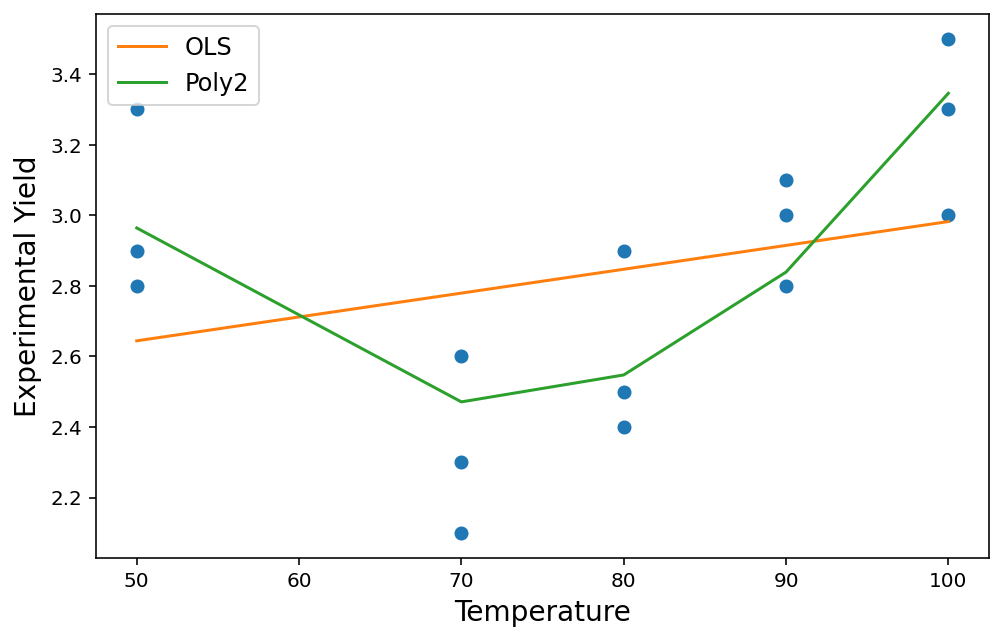

In [56]:
plt.plot(temperature, experimental_yield, 'o')
plt.plot(temperature, ols_model.predict(X), '-', label='OLS')
plt.plot(temperature, poly2_model.predict(X_poly2), '-', label='Poly2')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield')
plt.legend();

Note that you could very well use a regularization model such as Ridge or Lasso instead of the simple ordinary least squares LinearRegression model. In this case, it doesn't matter too much becuase we have only one feature (Temperature).

# Smoothing the plot of the model fit

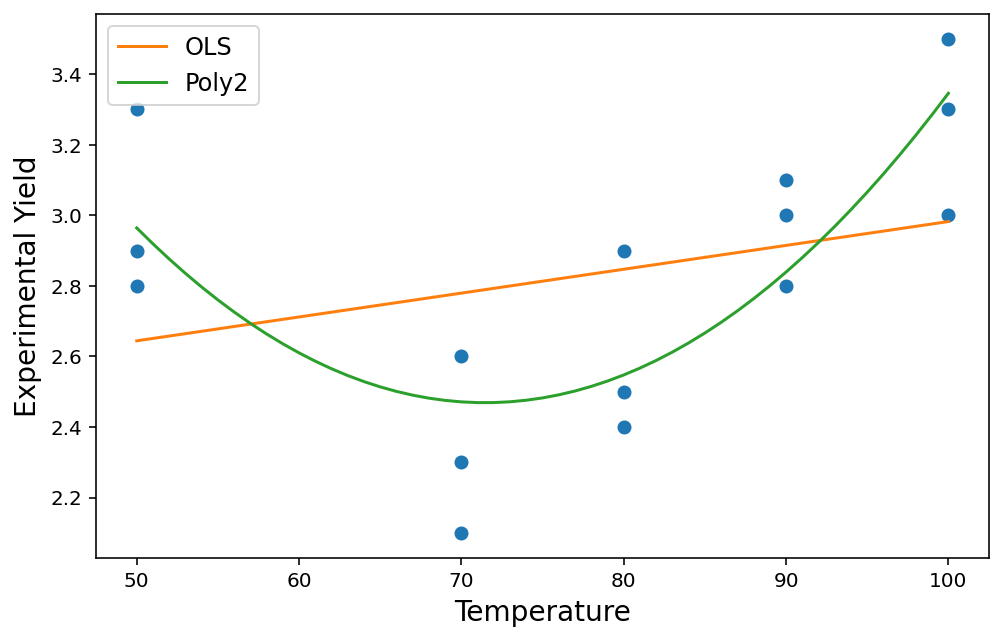

In [57]:
X_fit = np.arange(50, 101).reshape([-1, 1])
X_fit_poly2 = poly2.fit_transform(X_fit)

plt.plot(temperature, experimental_yield, 'o')
plt.plot(X_fit, ols_model.predict(X_fit), '-', label='OLS')
plt.plot(X_fit, poly2_model.predict(X_fit_poly2), '-', label='Poly2')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield')
plt.legend();

# Fit yield vs. temperature data with a $3^{rd}$ degree polynomial model

In [64]:
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly.fit_transform(X)

X.shape, X_poly3.shape

((15, 1), (15, 4))

In [65]:
poly3_model = LinearRegression()
poly3_model.fit(X_poly3, y)

LinearRegression()

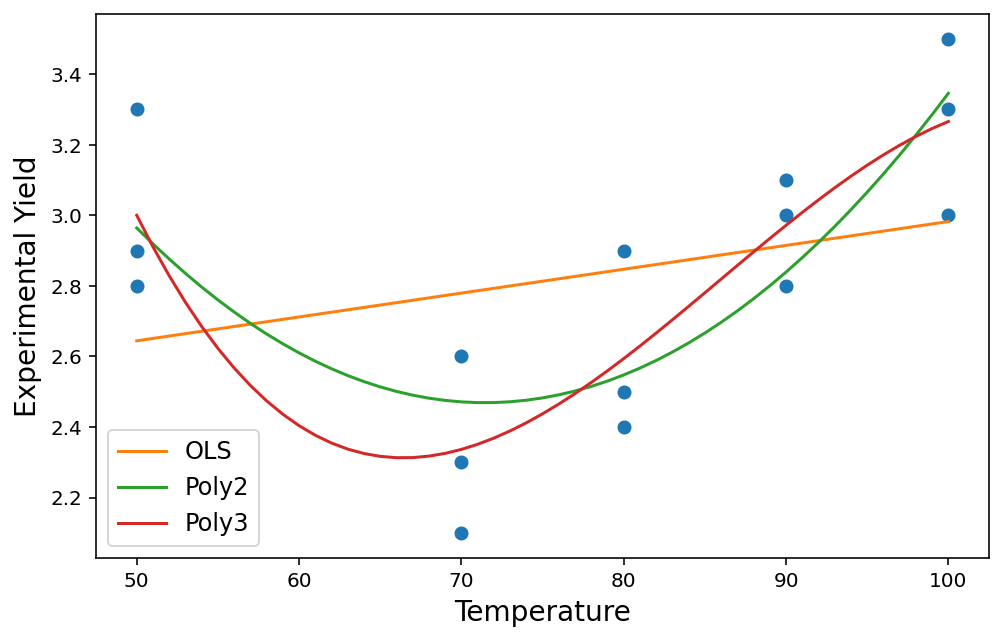

In [66]:
X_fit_poly3 = poly3.fit_transform(X_fit)
plt.plot(temperature, experimental_yield, 'o')
plt.plot(X_fit, ols_model.predict(X_fit), '-', label='OLS')
plt.plot(X_fit, poly2_model.predict(X_fit_poly2), '-', label='Poly2')
plt.plot(X_fit, poly3_model.predict(X_fit_poly3), '-', label='Poly3')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield')
plt.legend();

### Polynomial fit is clearly better than a linear fit, but which degree polynomial should we use?

### Why not try a range of polynomiall degrees, and see which one is best?

### But how do we determine which degree is best?

### We could use cross validation to determine the degree of polynomial that is most likely to best explain new data.

### Ideally, we would:

1. Split the data into training and testing sets
2. Perform cross validation on the training set to determine the best choice of polynomial degree
3. Fit the chosen model to the training set
4. Evaluate it on the withheld testing set

However, we have such little data that doing all of these splits is likely to leave individual partitions with subsets of data that are no longer representative of the relationship between temperature and yield.

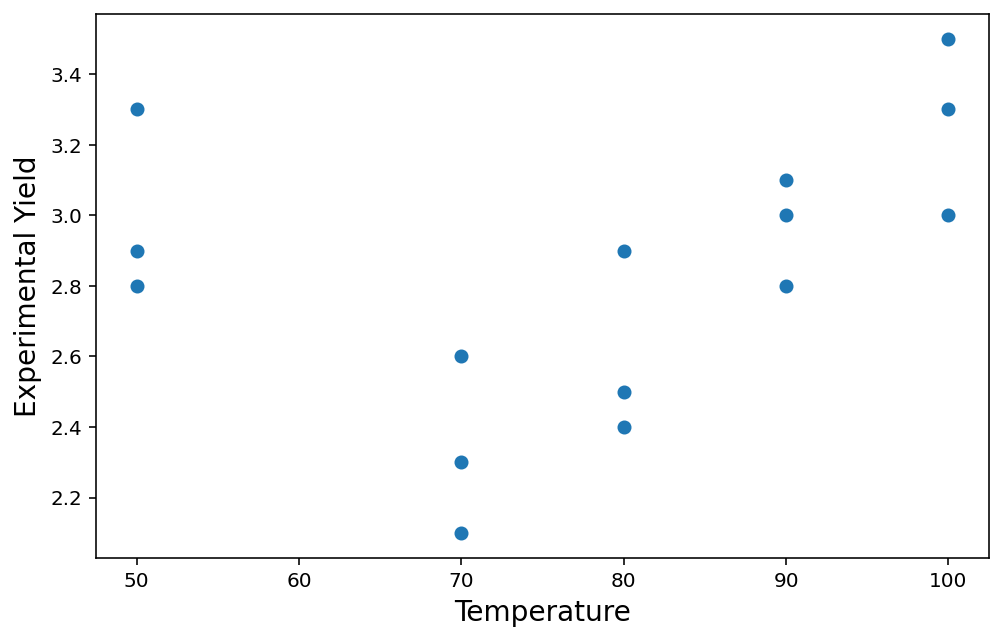

In [67]:
plt.plot(temperature, experimental_yield, 'o')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield');

Thus, I'll forgo splitting the data into training and testing sets, and we'll train our model on the entire dataset. This is not ideal of course, and it means we'll have to simply hope that our model generalizes to new data.

I will use 5-fold cross validation to tune the polynomial degree hyperparameter. You might also want to explore 10-fold or leave one out cross validation.

In [115]:
from sklearn.model_selection import cross_validate
cv_mse = []
for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    results = cross_validate(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    cv_mse.append(-results['test_score'])
cv_mse

[array([1.54729167, 0.10902972, 0.05471249, 0.04995471, 0.27818264]),
 array([0.10111111, 0.04276667, 0.04680278, 0.01579753, 0.045625  ])]

In [116]:
np.mean(cv_mse[0]), np.mean(cv_mse[1])

(0.40783424417629577, 0.05042061721828058)

Slightly better mean validation error for $3^{rd}$ degree polynomial.

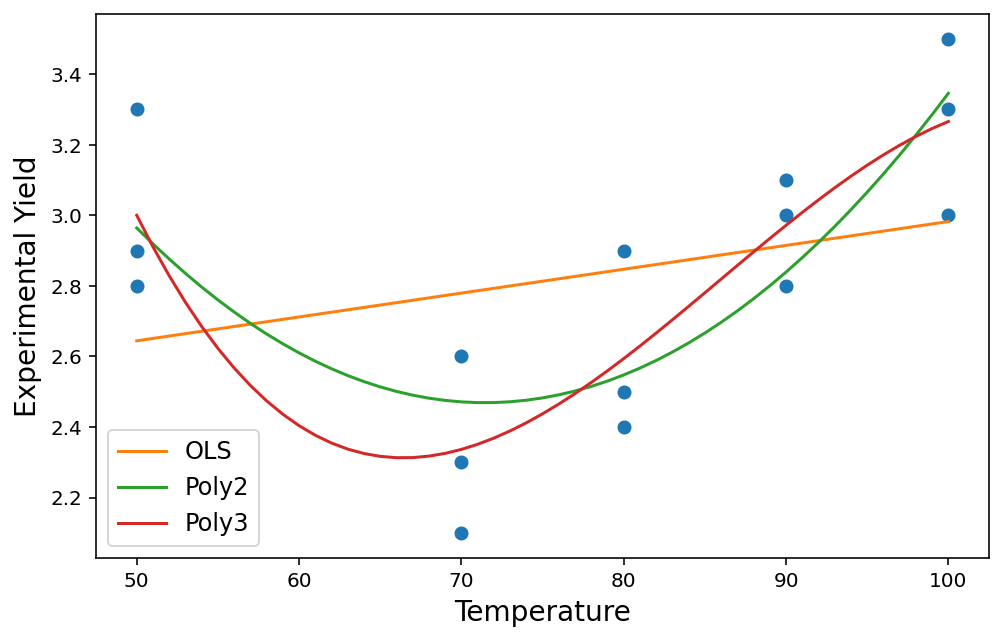

In [117]:
plt.plot(temperature, experimental_yield, 'o')
plt.plot(X_fit, ols_model.predict(X_fit), '-', label='OLS')
plt.plot(X_fit, poly2_model.predict(X_fit_poly2), '-', label='Poly2')
plt.plot(X_fit, poly3_model.predict(X_fit_poly3), '-', label='Poly3')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield')
plt.legend();

Despite the lower validation error for the $3^{rd}$ degree polynomial, we might still opt to stick with a $2^{nd}$ degree polynomial model. Why might we want to do that?

Less flexible models are more likely to generalize to new data because they are less likely to overfit noise.

Another important question to ask is whether the slight difference in mean validation error between $2^{nd}$ and $3^{rd}$ degree polynomial models is enough to really distinguish between the models?

One thing we can do is look at how variable the validation errors are across the various validation partitions.

In [118]:
cv_mse

[array([1.54729167, 0.10902972, 0.05471249, 0.04995471, 0.27818264]),
 array([0.10111111, 0.04276667, 0.04680278, 0.01579753, 0.045625  ])]

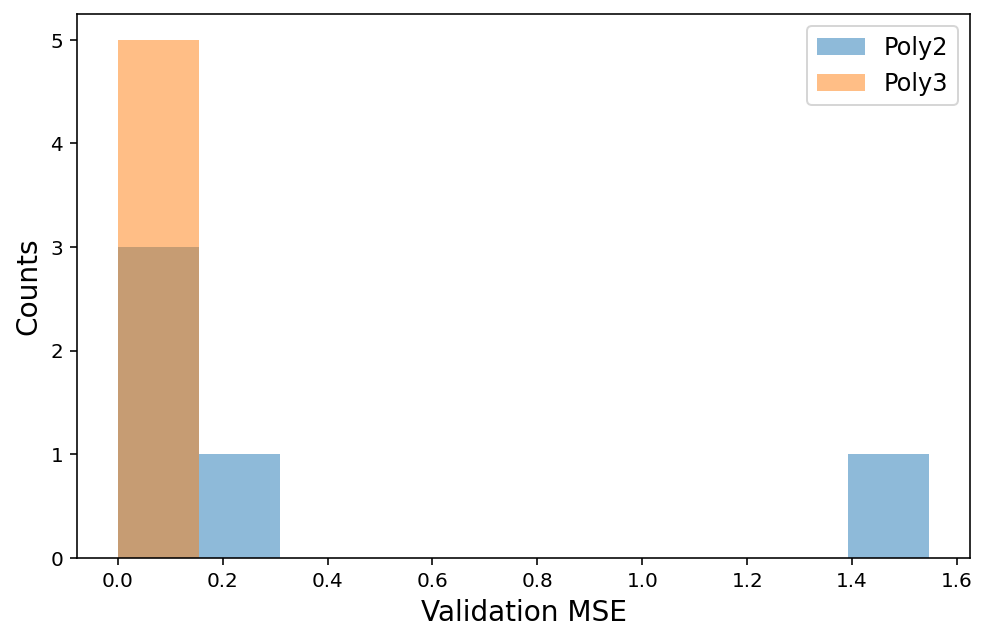

In [119]:
binedges = np.linspace(0, np.max(cv_mse[0]), 11)
plt.hist(cv_mse[0], binedges, alpha=0.5, label='Poly2')
plt.hist(cv_mse[1], binedges, alpha=0.5, label='Poly3')
plt.xlabel('Validation MSE')
plt.ylabel('Counts')
plt.legend();

Is the extra flexibility of the $3^{rd}$ degree polynomial model worth it, or is it more likely to overfit noise in our data and less likely to generalize to new measurements?

How dependent are our results on how we partitioned the data? Repeat the above using 10-fold cross validation.

Of course, more measurements, including measures at 60 degrees, would help you to better distinguish between these models.

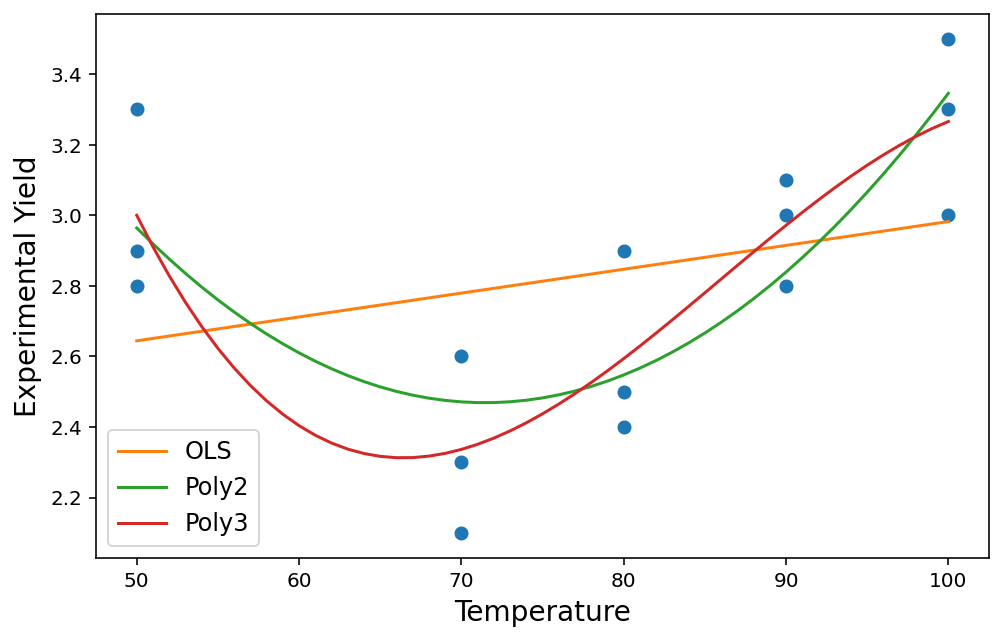

In [117]:
plt.plot(temperature, experimental_yield, 'o')
plt.plot(X_fit, ols_model.predict(X_fit), '-', label='OLS')
plt.plot(X_fit, poly2_model.predict(X_fit_poly2), '-', label='Poly2')
plt.plot(X_fit, poly3_model.predict(X_fit_poly3), '-', label='Poly3')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield')
plt.legend();